In [33]:
%matplotlib inline

from datetime import datetime

import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np

In [2]:
df = pd.read_csv("data/gemini_BTCUSD_day.csv", # http://www.cryptodatadownload.com/data/gemini/
                 names=["unix_ts", "datetime", "symbol", "open", "high", "low", "close", "volume"],
                 index_col="datetime", skiprows=2, parse_dates=True)

<div style="page-break-after: always;"></div>

In [3]:
df.sort_values(by=['datetime'], inplace=True)
df.sample(10)

,unix_ts,symbol,open,high,low,close,volume
datetime,,,,,,,
2020-06-13 04:00:00,1592020800000,BTCUSD,9411.45,9499.12,9352.71,9431.18,449.189145
2017-11-13 04:00:00,1510545600,BTCUSD,5957.67,6804.87,5931.65,6686.00,17474.953137
2018-08-18 04:00:00,1534564800000,BTCUSD,6526.19,6541.54,6300.00,6345.52,1290.794439
2017-11-24 04:00:00,1511496000,BTCUSD,8096.56,8340.02,8025.01,8214.57,4787.413805
2017-06-28 04:00:00,1498622400,BTCUSD,2536.85,2596.26,2470.01,2569.11,10461.243716
2020-11-17 04:00:00,1605585600000,BTCUSD,16597.83,18091.20,16577.44,18052.80,2721.207940
2017-06-05 04:00:00,1496635200,BTCUSD,2575.08,2870.00,2554.90,2820.86,8343.884169
2017-02-05 04:00:00,1486267200,BTCUSD,1028.90,1029.96,998.88,1016.95,1168.598427
2016-05-23 04:00:00,1463976000,BTCUSD,438.62,443.99,438.62,443.33,1429.494174


Plot our raw data and add a 20-day moving average:

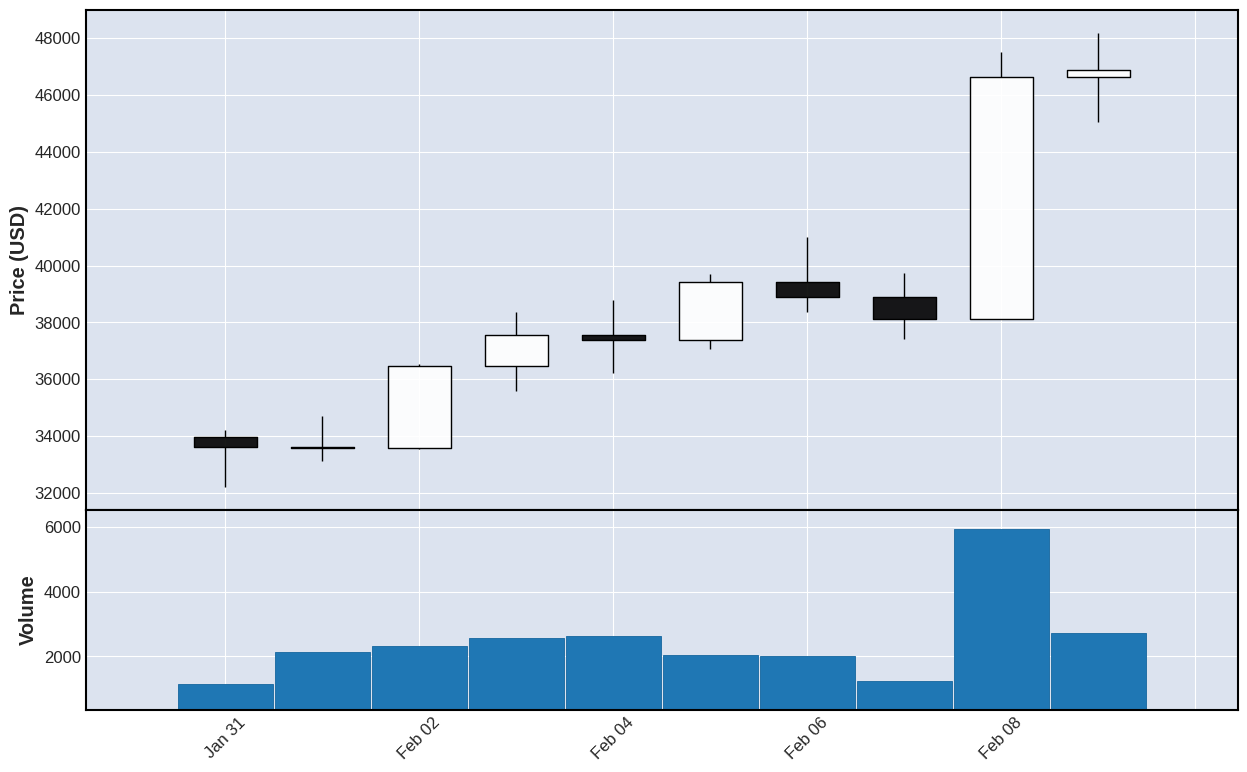

In [5]:
mpf.plot(df.loc['2021-01-31':'2021-03-16'], ylabel='Price (USD)', volume=True, type='candle', figsize=(16, 10))

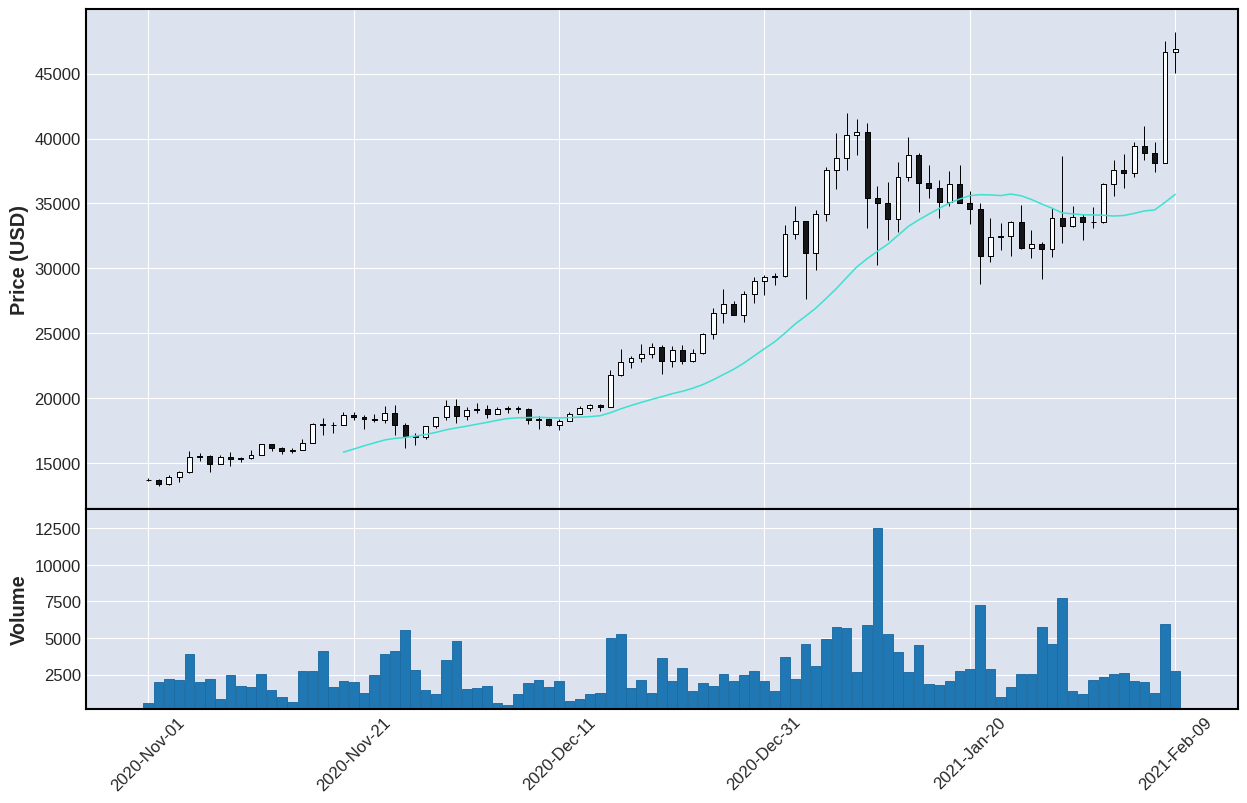

In [6]:
mpf.plot(df.loc['2020-11-01':'2021-02-16'], ylabel='Price (USD)', mav=20, volume=True, type='candle',
         figsize=(16, 10))

Lets try to look at the log of the price:
==========================================

In [16]:
df["ln_price"] = np.log(df["close"])

In [154]:
last_block = 676707 # Now
last_time = datetime(2021, 3, 28, 16, 23) # Now
blocks_per_day = 6 * 24 # on average
df["day_num"] = (df.index - last_time).days + last_block // blocks_per_day

In [156]:
df["ln_day_num"] = np.log(df["day_num"])

In [157]:
df

,unix_ts,symbol,open,high,low,close,volume,ln price,ln_price,day_num,ln_day_num
datetime,,,,,,,,,,,
2015-10-08 04:00:00,1444276800,BTCUSD,0.00,245.00,0.00,243.60,34.754703,5.495528,5.495528,2700,7.901007
2015-10-09 04:00:00,1444363200,BTCUSD,243.60,249.97,243.60,245.51,61.587068,5.503338,5.503338,2701,7.901377
2015-10-10 04:00:00,1444449600,BTCUSD,245.51,246.30,244.60,246.30,30.870549,5.506550,5.506550,2702,7.901748
2015-10-11 04:00:00,1444536000,BTCUSD,246.30,249.50,245.96,248.98,22.747091,5.517373,5.517373,2703,7.902118
2015-10-12 04:00:00,1444622400,BTCUSD,248.98,248.98,245.75,245.75,71.047743,5.504315,5.504315,2704,7.902487
...,...,...,...,...,...,...,...,...,...,...,...
2021-02-05 04:00:00,1612497600000,BTCUSD,37380.18,39700.00,37057.78,39415.76,2032.777336,10.581921,10.581921,4647,8.443977
2021-02-06 04:00:00,1612584000000,BTCUSD,39415.76,41000.00,38368.69,38897.95,2002.105270,10.568697,10.568697,4648,8.444192
2021-02-07 04:00:00,1612670400000,BTCUSD,38897.95,39748.96,37400.00,38107.34,1239.870461,10.548162,10.548162,4649,8.444407


<AxesSubplot:xlabel='day_num', ylabel='Ln(Price in USD)'>

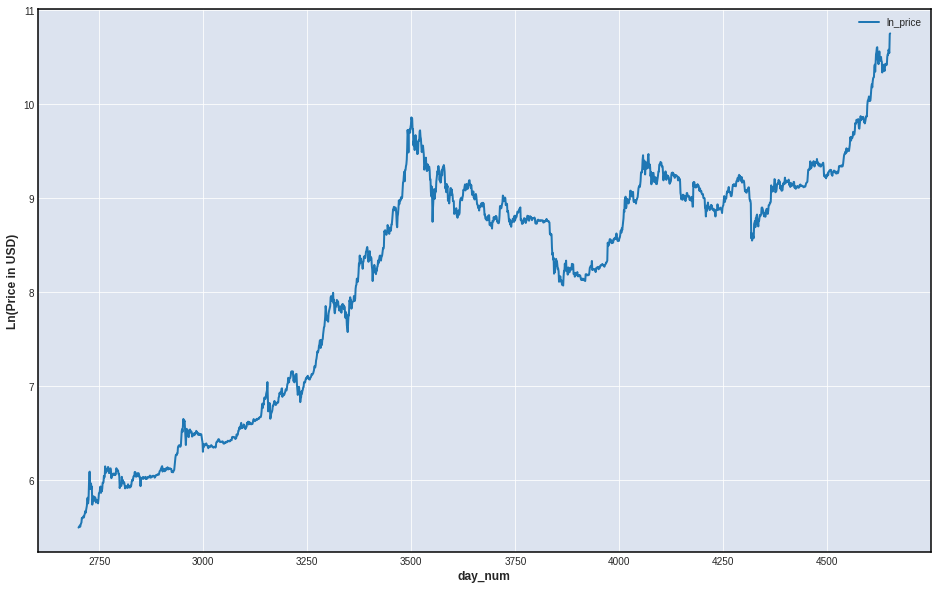

In [159]:
df.plot(x="day_num", y="ln_price", ylabel='Ln(Price in USD)', figsize=(16, 10))

In [145]:
start_block_reward = 50 # Original block reward for miners was 50 BTC
reward_interval = 210000 # 210000 is around every 4 years with a 10 minute block interval
total_supply = 21_000_000
block_in_10_years = last_block + blocks_per_day * 365 * 10

In [130]:
blocks_df = pd.DataFrame(np.arange(0, block_in_10_years, blocks_per_day), columns=["block", ])
blocks_df.index.name = "day_number"
blocks_df["reward"] = 50 * 2.0**(-1 * (blocks_df.block // reward_interval))
blocks_df["daily_supply"] = blocks_per_day * blocks_df.reward 
blocks_df["total_supply"] = blocks_df.daily_supply.cumsum()
blocks_df["mined_percentage"] = blocks_df["total_supply"] * 100 / total_supply
blocks_df["s2f"] = blocks_df.total_supply / (365 * blocks_df.daily_supply)
blocks_df

,block,reward,daily_supply,total_supply,mined_percentage,s2f
day_number,,,,,,
0,0,50.0000,7200.0,7200.0,0.034286,0.002740
1,144,50.0000,7200.0,14400.0,0.068571,0.005479
2,288,50.0000,7200.0,21600.0,0.102857,0.008219
3,432,50.0000,7200.0,28800.0,0.137143,0.010959
4,576,50.0000,7200.0,36000.0,0.171429,0.013699
...,...,...,...,...,...,...
8345,1201680,1.5625,225.0,20584350.0,98.020714,250.646575
8346,1201824,1.5625,225.0,20584575.0,98.021786,250.649315
8347,1201968,1.5625,225.0,20584800.0,98.022857,250.652055


In [131]:
blocks_df[last_block//blocks_per_day:last_block//blocks_per_day+1] # Status today:

,block,reward,daily_supply,total_supply,mined_percentage,s2f
day_number,,,,,,
4699,676656,6.25,900.0,18670500.0,88.907143,56.835616


Text(0, 0.5, 'Bitcoin Reward per Block (in BTC) - Orange line')

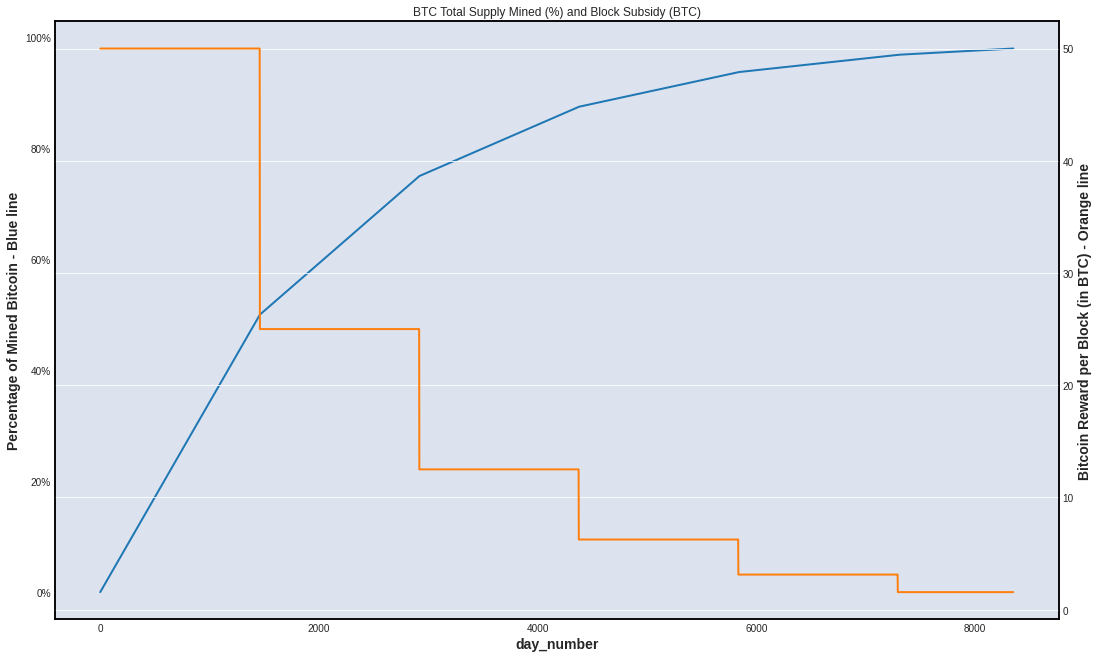

In [128]:
ax = blocks_df.mined_percentage.plot( figsize=(18, 11), title = "BTC Total Supply Mined (%) and Block Subsidy (BTC)")
ax.set_ylabel('Percentage of Mined Bitcoin - Blue line', fontsize=14);
ax.set_xlabel("Day number of existance of Bitcoin Blockchain", fontsize=14)
import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax = blocks_df.reward.plot(secondary_y=True)
ax.set_ylabel('Bitcoin Reward per Block (in BTC) - Orange line', fontsize=14)

In [4]:
df['ema'] = df.ta.ema()

In [9]:
help(ta.ema)

Help on function ema in module pandas_ta.overlap.ema:

ema(close, length=None, offset=None, **kwargs)
    Exponential Moving Average (EMA)
    
    The Exponential Moving Average is more responsive moving average compared to the
    Simple Moving Average (SMA).  The weights are determined by alpha which is
    proportional to it's length.  There are several different methods of calculating
    EMA.  One method uses just the standard definition of EMA and another uses the
    SMA to generate the initial value for the rest of the calculation.
    
    Sources:
        https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:moving_averages
        https://www.investopedia.com/ask/answers/122314/what-exponential-moving-average-ema-formula-and-how-ema-calculated.asp
    
    Calculation:
        Default Inputs:
            length=10, adjust=False, sma=True
        if sma:
            sma_nth = close[0:length].sum() / length
            close[:length - 1] = np.NaN
      

In [24]:
df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.2.42b0
Total Indicators: 129
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_doji, cdl_inside, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, decay, decreasing, dema, donchian, dpo, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, ichimoku, increasing, inertia, kama, kc, kdj, kst, kurtosis, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, ssf, stdev, stoch, stochrsi, supertrend, swma, t3, tema, thermo, trend_return, trima, trix, true_range, tsi, ttm_trend, ui, uo, variance, vidya, vortex, vp, vwap, vwma, wcp, willr, wma, zlma, zscore


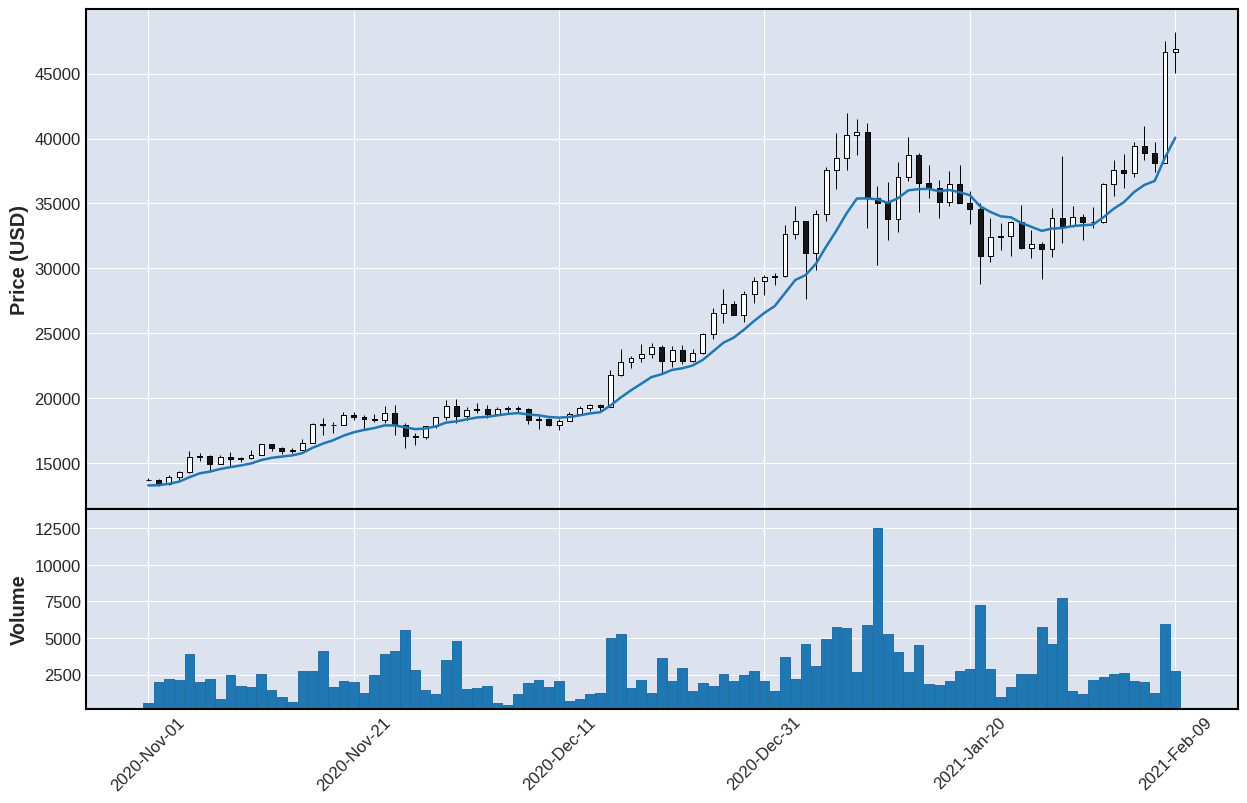

In [52]:
apdict = mpf.make_addplot(df['ema'].loc['2020-11-01':'2021-02-16'])
mpf.plot(df.loc['2020-11-01':'2021-02-16'], ylabel='Price (USD)', volume=True, addplot=apdict, type="candle",
         figsize=(16, 10))

In [5]:
e = pd.DataFrame()

e.ta.indicators()


Pandas TA - Technical Analysis Indicators - v0.2.42b0
Total Indicators: 129
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_doji, cdl_inside, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, decay, decreasing, dema, donchian, dpo, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, ichimoku, increasing, inertia, kama, kc, kdj, kst, kurtosis, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, ssf, stdev, stoch, stochrsi, supertrend, swma, t3, tema, thermo, trend_return, trima, trix, true_range, tsi, ttm_trend, ui, uo, variance, vidya, vortex, vp, vwap, vwma, wcp, willr, wma, zlma, zscore


In [13]:
df["gradient"] = np.gradient(df["ema"])

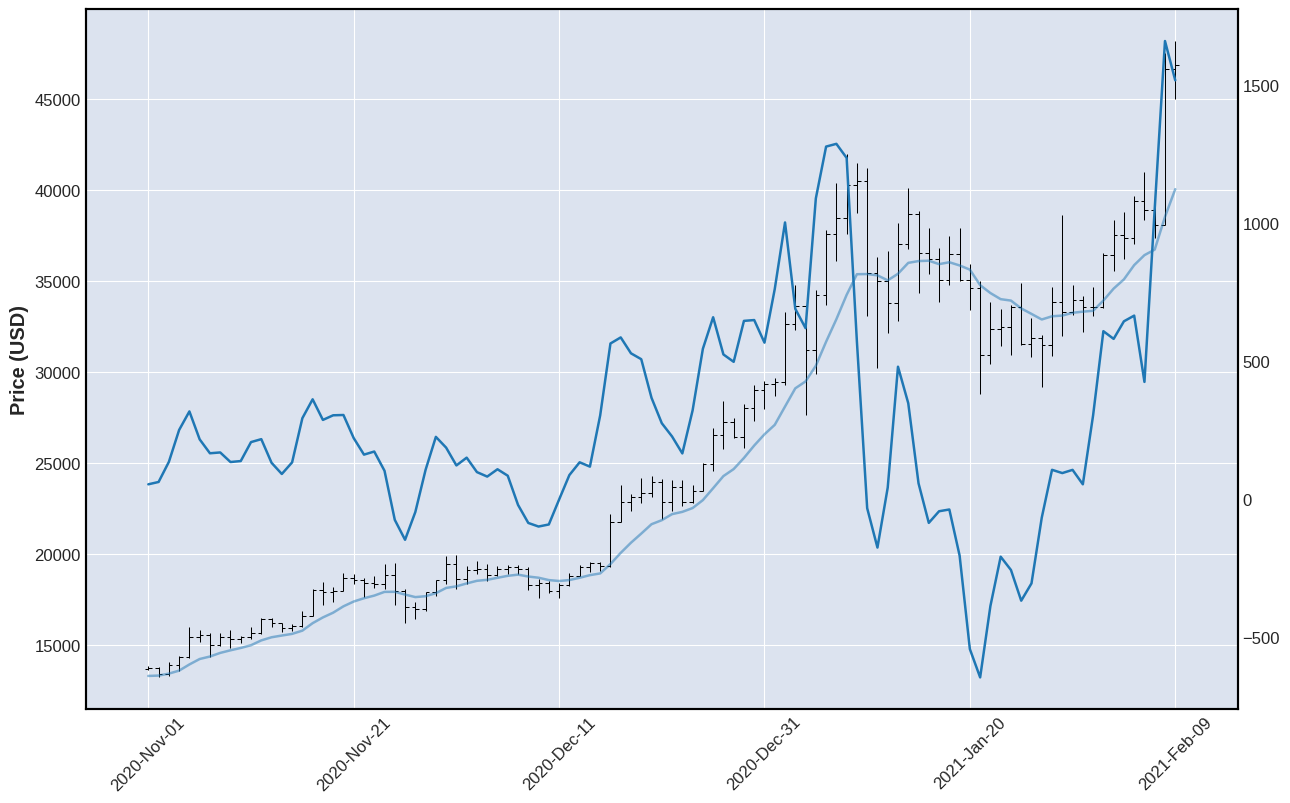

In [56]:
apdict = [mpf.make_addplot(df['ema'].loc['2020-11-01':'2021-02-16'], alpha=0.5),
          mpf.make_addplot(df['gradient'].loc['2020-11-01':'2021-02-16'])]
mpf.plot(df.loc['2020-11-01':'2021-02-16'], ylabel='Price (USD)', addplot=apdict, figsize=(16, 10))

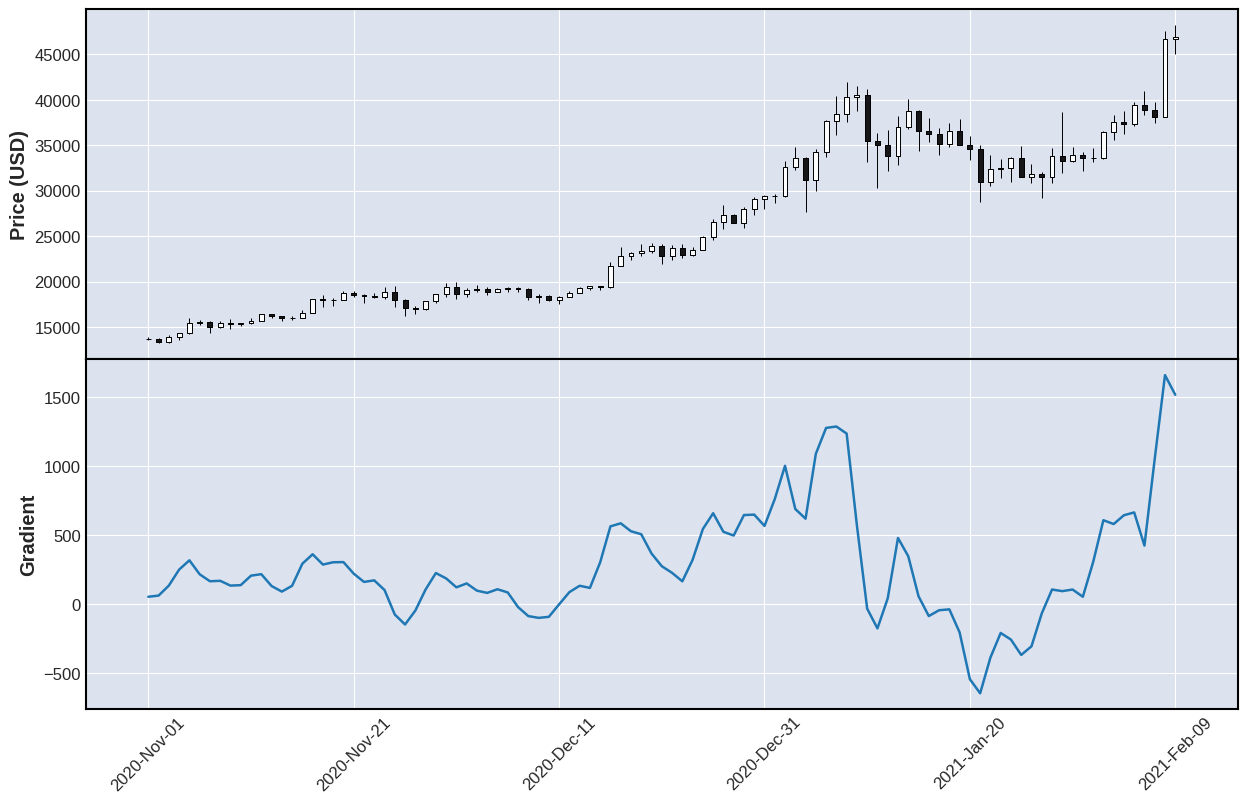

In [15]:
ap = mpf.make_addplot(df['gradient'].loc['2020-11-01':'2021-02-16'],panel=1,type='line',ylabel='Gradient')
mpf.plot(df.loc['2020-11-01':'2021-02-16'], ylabel='Price (USD)'
         ,type='candle', addplot=ap,panel_ratios=(1,1),figratio=(1,1),figscale=1.5, figsize=(16, 10))

Vortex Indicator:
------------------------
Two oscillators that capture positive and negative trend movement.


https://www.investopedia.com/terms/v/vortex-indicator-vi.asp

In [17]:
help(ta.vortex)

Help on function vortex in module pandas_ta.trend.vortex:

vortex(high, low, close, length=None, drift=None, offset=None, **kwargs)
    Vortex
    
    Two oscillators that capture positive and negative trend movement.
    
    Sources:
        https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:vortex_indicator
    
    Calculation:
        Default Inputs:
            length=14, drift=1
        TR = True Range
        SMA = Simple Moving Average
        tr = TR(high, low, close)
        tr_sum = tr.rolling(length).sum()
    
        vmp = (high - low.shift(drift)).abs()
        vmn = (low - high.shift(drift)).abs()
    
        VIP = vmp.rolling(length).sum() / tr_sum
        VIM = vmn.rolling(length).sum() / tr_sum
    
    Args:
        high (pd.Series): Series of 'high's
        low (pd.Series): Series of 'low's
        close (pd.Series): Series of 'close's
        length (int): ROC 1 period.  Default: 14
        drift (int): The difference period.   Defaul

In [18]:
df.ta.vortex()

,VTXP_14,VTXM_14
datetime,,
2015-10-08 04:00:00,NaN,NaN
2015-10-09 04:00:00,NaN,NaN
2015-10-10 04:00:00,NaN,NaN
2015-10-11 04:00:00,NaN,NaN
2015-10-12 04:00:00,NaN,NaN
...,...,...
2021-02-05 04:00:00,1.164964,0.854177
2021-02-06 04:00:00,1.170950,0.814341
2021-02-07 04:00:00,1.160481,0.848618


Trix:
-------

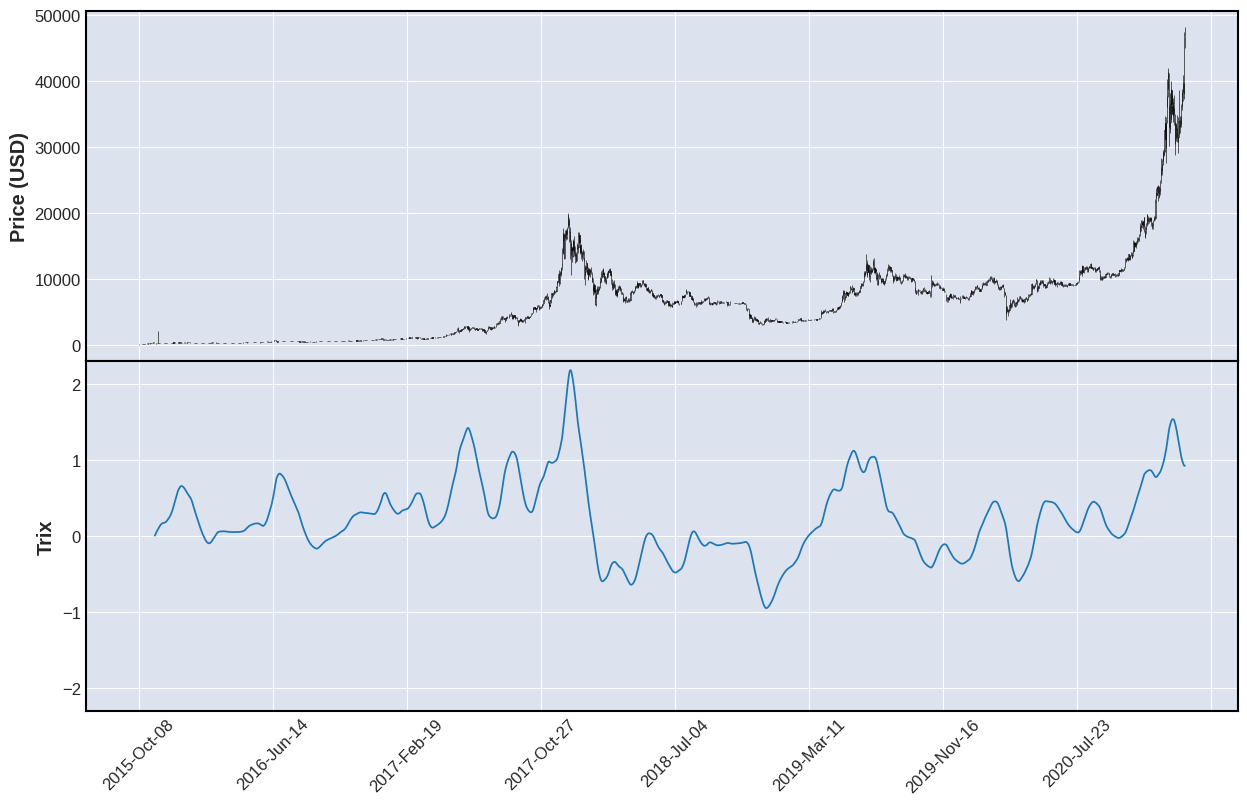

In [48]:
ap = mpf.make_addplot(df.ta.trix()["TRIX_30_9"].loc['2010-11-01':'2021-02-16'], panel=1, type='line',
                      ylabel='Trix', ylim=(-2.3,2.3))
mpf.plot(df.loc['2010-11-01':'2021-02-16'], ylabel='Price (USD)',
         type='candle', addplot=ap,panel_ratios=(1,1),figratio=(1,1),figscale=1.5, figsize=(16, 10))

TODO:
------
* horizontal line at x=0
* Get more historical data
* colors for below zero and above zero, downwards and upwards
* Markers for when oscillator goes above / below zero

In [37]:
import matplotlib.axes   as mpl_axes